Cleaned Column Names:
Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'marking', 'slide_tackle', 'stand_tackle', 'aggression',
       'reactions', 'att_position', 'interceptions', 'vision', 'composure',
       'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina',
       'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')


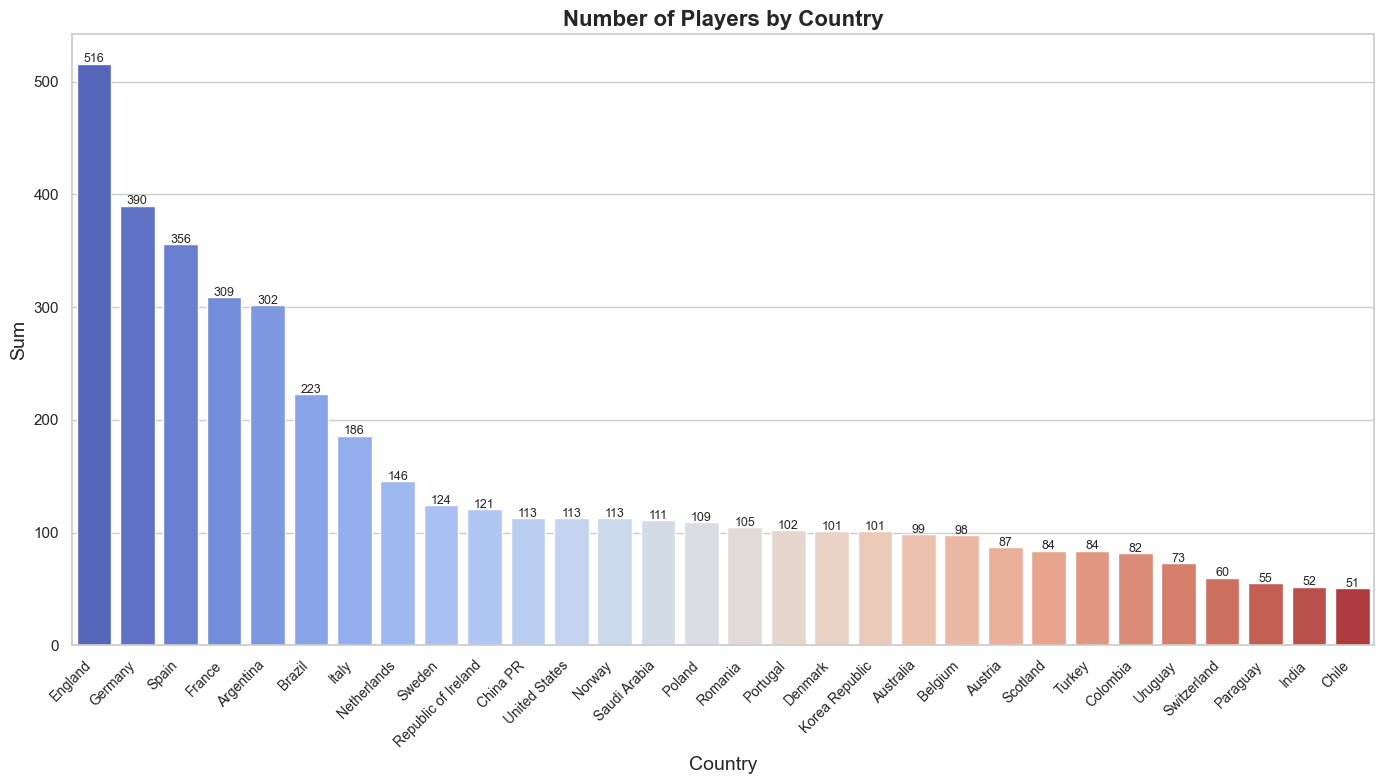

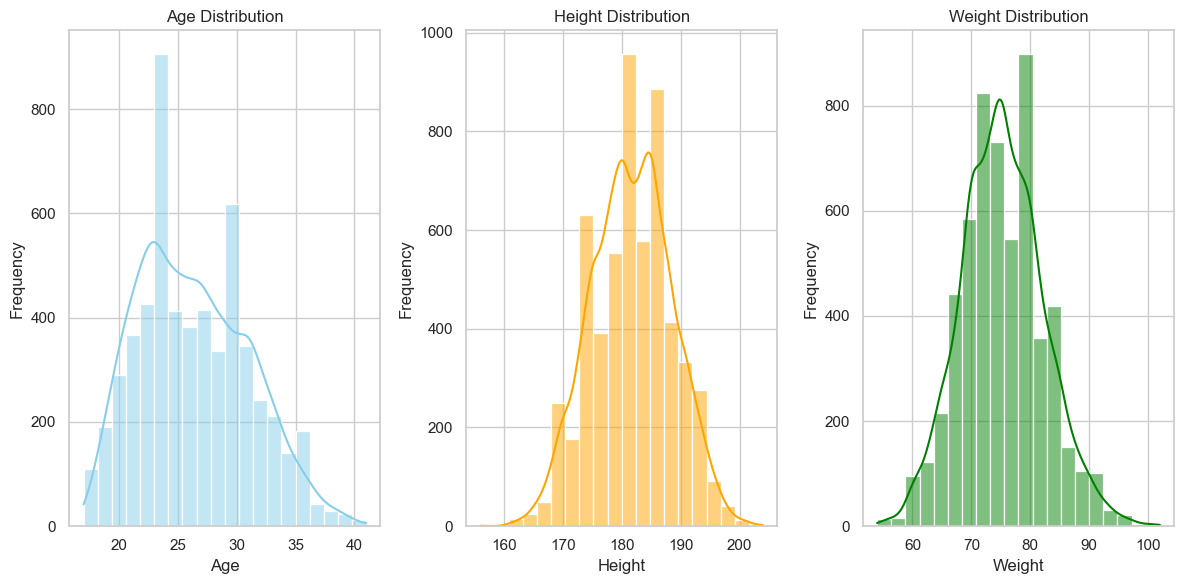

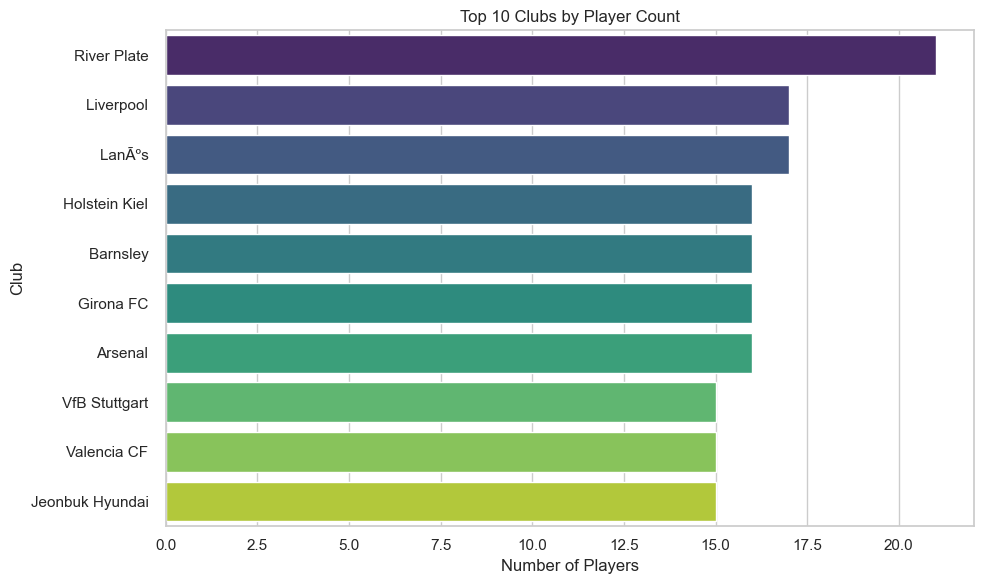

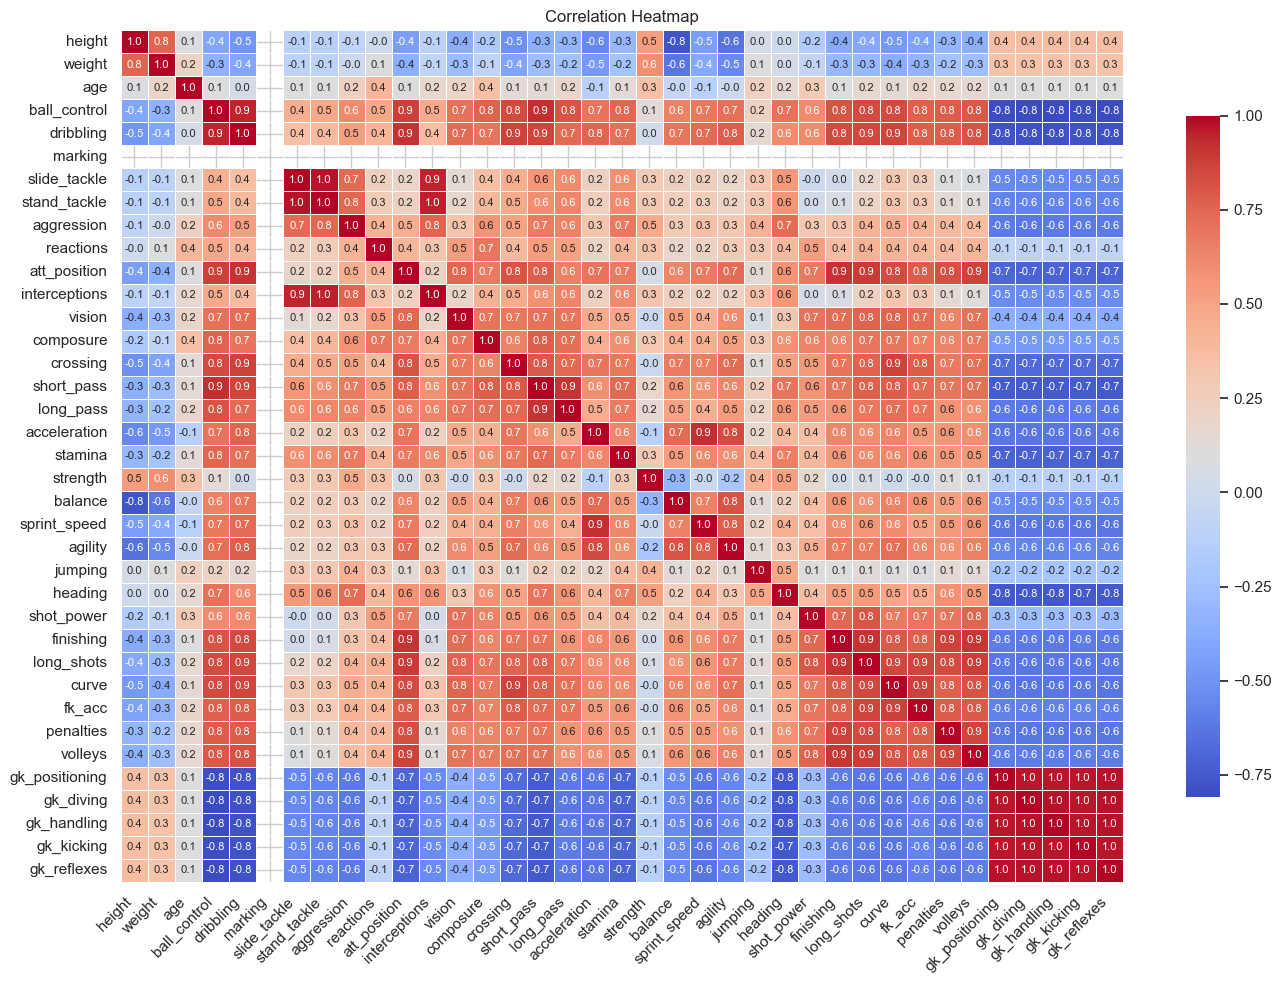

Handling missing values...
Missing values handled. Current dataset size: (5682, 41)
Training set size: 4545, Test set size: 1137
Feature scaling complete.


/Users/jhansi/Documents/FootballPlayerPositionPrediction/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

/Users/jhansi/Documents/FootballPlayerPositionPrediction/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

/Users/jhansi/Documents/FootballPlayerPositionPrediction/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning:

invalid value encountered in divide



Model training complete.
Prediction complete.
Accuracy: 0.14
Precision: 0.14
Recall: 0.14
F1 Score: 0.13
Classification Report:

              precision    recall  f1-score   support

          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         8
          12       0.17      0.40      0.24         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         5
          18       0.08      0.12      0.10         8
          19       0.09      0.10      0.10        10
          20       0.07      0.10      0.08        10
          21       0.00      0.00      0.00         5
          22       0.08      0.12      0.10         8
          23       0.10      0.25      0.14         8
          24       0.00      0.00      0.00         3
      

/Users/jhansi/Documents/FootballPlayerPositionPrediction/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/jhansi/Documents/FootballPlayerPositionPrediction/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/jhansi/Documents/FootballPlayerPositionPrediction/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/jhansi/Documents/FootballPlayerPositionPrediction/venv/lib/python3.13/site-packages/sklearn/metrics/_classific

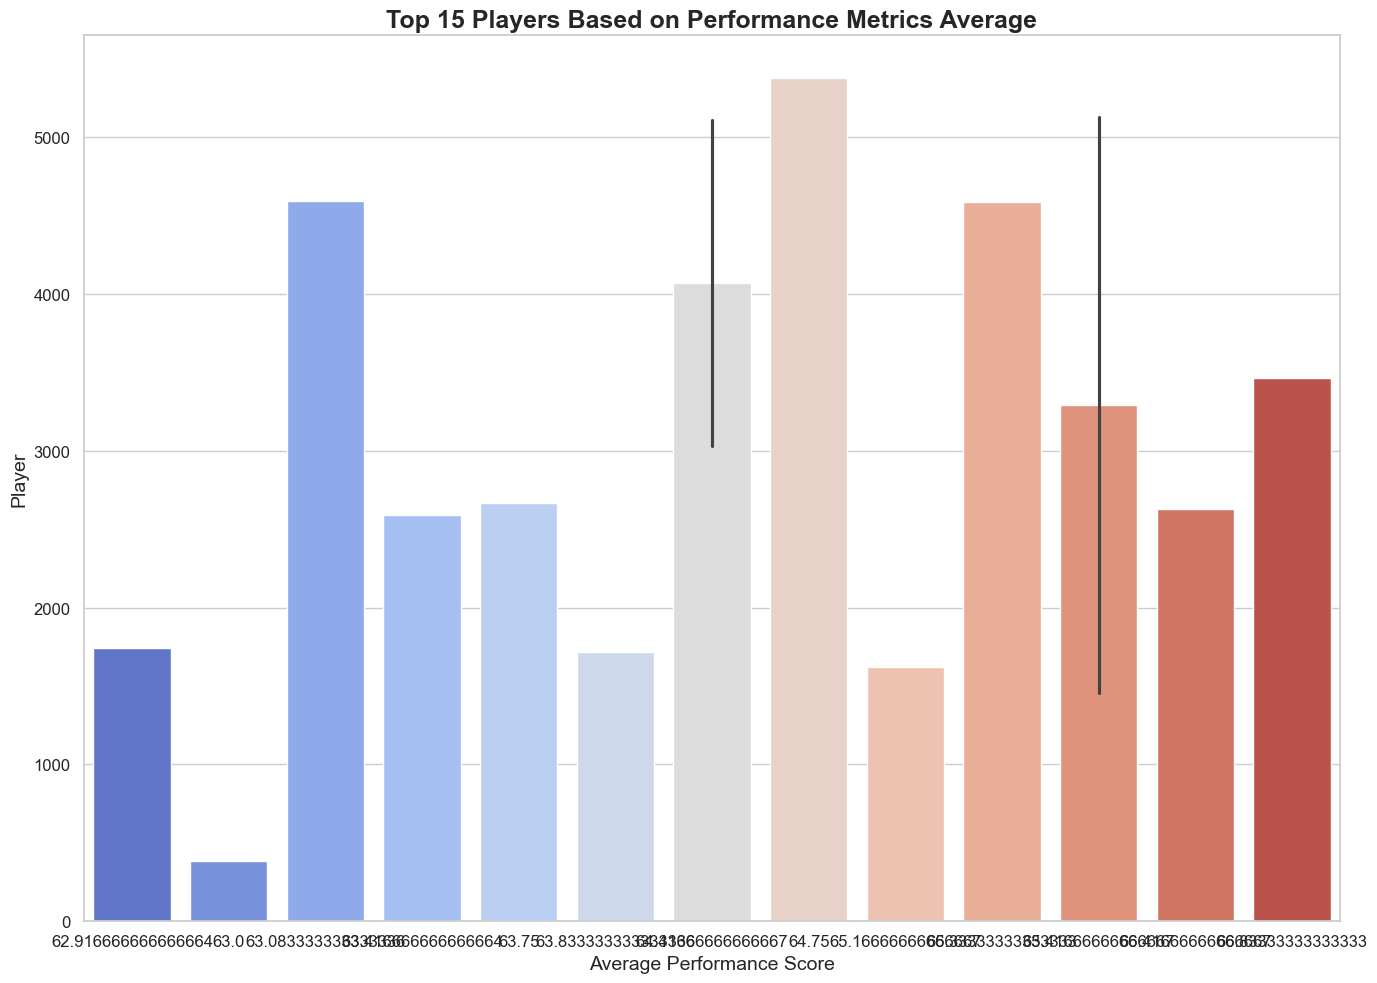

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset with ISO-8859-1 encoding to handle special characters
file_path = "/Users/jhansi/Documents/FootballPlayerPositionPrediction/data/player_stats.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Clean column names (strip spaces and lowercase)
df.columns = df.columns.str.strip().str.lower()

# Remove any hidden characters in the player names
df['player'] = df['player'].str.strip()  # Remove leading/trailing spaces

# Print column names after cleaning to ensure they match what we expect
print("Cleaned Column Names:")
print(df.columns)

# =========================
# 1. Country Distribution (Top 15 Countries) - Vertical Bar Graph
# =========================
# Check for the column that contains country information
if 'nationality' in df.columns:
    country_col = 'nationality'
elif 'country' in df.columns:
    country_col = 'country'
else:
    raise ValueError("Column for nationality or country not found in the dataset.")

# List of countries to include, in reverse order (England first, Chile last)
target_countries = [
    "England", "Germany", "Spain", "France", "Argentina", "Brazil",
    "Italy", "Netherlands", "Sweden", "Republic of Ireland", "China PR", 
    "United States", "Norway", "Saudi Arabia", "Poland", "Romania", "Portugal",
    "Denmark", "Korea Republic", "Australia", "Belgium", "Austria", "Scotland", 
    "Turkey", "Colombia", "Uruguay", "Switzerland", "Paraguay", "India", "Chile"
]

# Filter the dataset for only the target countries
filtered_data = df[df[country_col].isin(target_countries)]

# Count players for each country
country_counts = filtered_data[country_col].value_counts()

# Sort the countries by the reverse order
country_counts = country_counts.reindex(target_countries)

# Create a DataFrame for country data
country_df = pd.DataFrame({
    'Country': country_counts.index,
    'Players': country_counts.values
})

# Plot a vertical bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Players', data=country_df, hue='Country', palette='coolwarm')  

# Add labels to the bars
for index, row in country_df.iterrows():
    plt.text(index, row.Players + 1, str(int(row.Players)), ha='center', fontsize=9)

# Add title and labels
plt.title('Number of Players by Country', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Sum', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# =========================
# 2. Age, Height, and Weight Distribution
# =========================
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Height Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['height'], bins=20, kde=True, color="orange")
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Weight Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['weight'], bins=20, kde=True, color="green")
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# =========================
# 3. Top 10 Clubs by Player Count
# =========================
top_clubs = df['club'].value_counts().head(10)

# Plot the top 10 clubs by player count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs.values, y=top_clubs.index, hue=top_clubs.index, palette="viridis")  # Added hue
plt.title("Top 10 Clubs by Player Count")
plt.xlabel("Number of Players")
plt.ylabel("Club")
plt.tight_layout()
plt.show()


# =========================
# =========================
# 3D Football Field Graph: Ball Control, Dribbling, Aggression
# =========================
# Create a 3D scatter plot for Ball Control, Dribbling, and Aggression
fig = go.Figure()

# Add scatter plot for players
fig.add_trace(go.Scatter3d(
    x=df['ball_control'],  # X-axis: Ball Control
    y=df['dribbling'],     # Y-axis: Dribbling
    z=df['aggression'],    # Z-axis: Aggression
    mode='markers',
    marker=dict(
        size=8,  # Ball size
        color=df['aggression'],  # Use aggression for color scale
        colorscale='Viridis',  # Vibrant color scheme
        opacity=0.8
    ),
    text=[f"Player: {player}" for player in df['player']]
))

# Add a 3D football field as background (grid lines)
x = np.linspace(20, 100, 10)  # Ball Control (X-axis)
y = np.linspace(20, 100, 10)  # Dribbling (Y-axis)
z = np.linspace(0, 80, 5)     # Aggression (Z-axis)

for x_val in x:
    fig.add_trace(go.Scatter3d(
        x=[x_val] * len(y),
        y=y,
        z=[0] * len(y),
        mode='lines',
        line=dict(color='green', width=2),
        showlegend=False
    ))

for y_val in y:
    fig.add_trace(go.Scatter3d(
        x=x,
        y=[y_val] * len(x),
        z=[0] * len(x),
        mode='lines',
        line=dict(color='green', width=2),
        showlegend=False
    ))

# Axis labels embedded on the right
fig.update_layout(
    scene=dict(
        xaxis=dict(title="Ball Control"),
        yaxis=dict(title="Dribbling"),
        zaxis=dict(title="Aggression"),
        xaxis_showspikes=False,
        yaxis_showspikes=False,
        zaxis_showspikes=False,
        aspectmode="manual",
        aspectratio=dict(x=2, y=2, z=1)  # Flatten to resemble a field
    ),
    annotations=[
        dict(
            text="X: Ball Control<br>Y: Dribbling<br>Z: Aggression",
            x=1.1,  # Positioned to the right of the graph
            y=0.5,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12, color="black"),
            align="left",
            bgcolor="white",
            opacity=0.8
        )
    ],
    margin=dict(l=0, r=0, b=0, t=50),
    title=dict(
        text="3D Football Field: Ball Control, Dribbling, Aggression",
        font=dict(size=16)
    )
)

fig.show()

# =========================
# 4. 3D Graph for Technical Attributes (Plotly)
# =========================
# Updated styling to match the sample figure
fig = go.Figure(data=[go.Scatter3d(
    x=df['ball_control'],
    y=df['dribbling'],
    z=df['aggression'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['aggression'],  # Color by aggression
        colorscale='Rainbow',  # Match vibrant color palette
        opacity=0.8
    ),
    text=[f"Player: {player}" for player in df['player']]
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="Ball Control", titlefont=dict(size=12)),
        yaxis=dict(title="Dribbling", titlefont=dict(size=12)),
        zaxis=dict(title="Aggression", titlefont=dict(size=12)),
    ),
    title=dict(text="3D Scatter Plot for Ball Control, Dribbling, and Aggression",
               font=dict(size=16)),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust margins
)

fig.show()

# =========================
# 5. 3D Graph for Defensive and Passing Attributes (Plotly)
# =========================
fig = go.Figure(data=[go.Scatter3d(
    x=df['slide_tackle'],
    y=df['stand_tackle'],
    z=df['interceptions'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['interceptions'],  # Color by interceptions
        colorscale='Rainbow',  # Vibrant colors
        opacity=0.8
    ),
    text=[f"Player: {player}" for player in df['player']]
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="Slide Tackle", titlefont=dict(size=12)),
        yaxis=dict(title="Stand Tackle", titlefont=dict(size=12)),
        zaxis=dict(title="Interceptions", titlefont=dict(size=12)),
    ),
    title=dict(text="3D Scatter Plot for Slide Tackle, Stand Tackle, and Interceptions",
               font=dict(size=16)),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

# =========================
# 6. 3D Graph for Passing and Shooting Attributes (Plotly)
# =========================
fig = go.Figure(data=[go.Scatter3d(
    x=df['short_pass'],
    y=df['long_pass'],
    z=df['shot_power'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['shot_power'],  # Color by shot power
        colorscale='Rainbow',  # Match vibrant colors
        opacity=0.8
    ),
    text=[f"Player: {player}" for player in df['player']]
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="Short Pass", titlefont=dict(size=12)),
        yaxis=dict(title="Long Pass", titlefont=dict(size=12)),
        zaxis=dict(title="Shot Power", titlefont=dict(size=12)),
    ),
    title=dict(text="3D Scatter Plot for Short Pass, Long Pass, and Shot Power",
               font=dict(size=16)),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


# =========================
# =========================
# 7. 3D Graph for Goalkeeper Attributes (Plotly)
# =========================
fig = go.Figure(data=[go.Scatter3d(
    x=df['gk_positioning'],
    y=df['gk_diving'],
    z=df['gk_handling'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['gk_handling'],  # Color by GK Handling
        colorscale='Rainbow',  # Vibrant and varied color palette
        opacity=0.8
    ),
    text=[f"Player: {player}" for player in df['player']]
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="GK Positioning", titlefont=dict(size=12)),
        yaxis=dict(title="GK Diving", titlefont=dict(size=12)),
        zaxis=dict(title="GK Handling", titlefont=dict(size=12)),
    ),
    title=dict(text="3D Scatter Plot for GK Positioning, Diving, and Handling",
               font=dict(size=16)),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust margins
)

fig.show()


# =========================
# 8. Correlation Heatmap
# =========================
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_df.corr()

# Set up the figure size
plt.figure(figsize=(14, 10))

# Create the heatmap with adjusted settings
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".1f", annot_kws={'size': 8}, cbar_kws={'shrink': 0.8}, linewidths=0.5)

# Rotate the axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Title for the heatmap
plt.title("Correlation Heatmap")

# Show the heatmap
plt.tight_layout()
plt.show()

# =========================
# 9. Feature Engineering & Model Implementation
# =============================================
# Handle missing values (if any)
if df.isnull().sum().sum() > 0:  # Check if there are any missing values
    print("Handling missing values...")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    print(f"Missing values handled. Current dataset size: {df.shape}")
else:
    print("No missing values found.")

# Check for missing or invalid data in the target column (e.g., 'ball_control')
target_column = 'ball_control'  # Replace with your desired target column

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' column is missing from the dataset.")

# Check for missing or invalid data in the target column
if df[target_column].isnull().all():
    raise ValueError(f"'{target_column}' column has no valid data.")
elif df[target_column].isnull().any():
    print(f"Warning: '{target_column}' column contains missing values. Filling missing values with 0.")
    df[target_column] = df[target_column].fillna(0)

# Additional check for invalid data in the target column (e.g., non-numeric or unexpected values)
if not pd.api.types.is_numeric_dtype(df[target_column]):
    raise ValueError(f"'{target_column}' column contains non-numeric data, expected numeric values.")

# Identify and encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # Automatically detect object columns (e.g., country names, player names)

# Apply Label Encoding for categorical features (convert them to numeric)
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Feature selection - use relevant columns for the model
try:
    X = df.drop(columns=[target_column])
    y = df[target_column]
except KeyError as e:
    raise ValueError(f"Error selecting features: {e}")

# Verify the dataset is not empty after handling missing values
if X.empty or y.empty:
    raise ValueError("No valid data available for training after preprocessing.")

# Split data into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")
except ValueError as e:
    raise ValueError(f"Error during train-test split: {e}")

# Feature scaling (optional for better performance, particularly with distance-based models)
scaler = StandardScaler()
try:
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    print("Feature scaling complete.")
except ValueError as e:
    raise ValueError(f"Error during feature scaling: {e}")

# Build and train a Random Forest model
model = RandomForestClassifier(random_state=42)
try:
    model.fit(X_train, y_train)
    print("Model training complete.")
except ValueError as e:
    raise ValueError(f"Error training the model: {e}")

# Predictions
try:
    y_pred = model.predict(X_test)
    print("Prediction complete.")
except ValueError as e:
    raise ValueError(f"Error during prediction: {e}")

# Evaluate the model
try:
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
except ValueError as e:
    raise ValueError(f"Error calculating evaluation metrics: {e}")

# try:
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Create a figure with a larger size for better readability
    plt.figure(figsize=(12, 10))  # Adjusted figure size for clarity
    
    # Plot the heatmap with adjusted parameters
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=model.classes_, yticklabels=model.classes_,
                cbar_kws={'label': 'Number of Predictions'}, linewidths=1, 
                linecolor='gray', annot_kws={'size': 14, 'weight': 'bold'})
    
    # Adjusting labels, title, and axis for better readability
    plt.title('Confusion Matrix', fontsize=20, weight='bold')
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(rotation=0, fontsize=14)  # Align y-tick labels horizontally for better visibility
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    
    # Show the plot
    plt.show()
    
except ValueError as e:
    raise ValueError(f"Error during confusion matrix calculation or plotting: {e}")



# Classification Report
try:
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Optionally, display the classification report as a DataFrame
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(report_df)
except ValueError as e:
    raise ValueError(f"Error generating the classification report: {e}")

# 10. Player Performance Metrics
# =========================
# Select numerical performance-related columns
performance_columns = [
    'ball_control', 'dribbling', 'aggression', 'slide_tackle', 'stand_tackle',
    'interceptions', 'short_pass', 'long_pass', 'shot_power', 'gk_positioning',
    'gk_diving', 'gk_handling'
]

# Ensure columns exist before proceeding
missing_cols = [col for col in performance_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in the dataset: {missing_cols}")

# Calculate the average of the selected columns for each player
df['performance_avg'] = df[performance_columns].mean(axis=1)

# Plot the player performance metrics
plt.figure(figsize=(14, 10))  # Larger figure for better visibility

# Sort players by their performance average for better visualization
sorted_df = df[['player', 'performance_avg']].sort_values(by='performance_avg', ascending=False)

# Ensure 'player' column exists
if 'player' not in df.columns:
    raise ValueError("'player' column is missing in the dataset.")

# Create a horizontal bar plot for the top 15 players based on performance average
sns.barplot(x='performance_avg', y='player', data=sorted_df.head(15), palette='coolwarm')

# Add title and labels
plt.title('Top 15 Players Based on Performance Metrics Average', fontsize=18, weight='bold')
plt.xlabel('Average Performance Score', fontsize=14)
plt.ylabel('Player', fontsize=14)

# Increase label size and adjust layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

